In [1]:
import numpy as np
import os
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

### hjælpefunktioner

In [2]:
def biniaryyn_variable(dataframe, variable):
    
    # drop missing data
#    dataframe.drop(dataframe[dataframe[variable] == '.: Missing Form/Incomplete Workbook'].index, inplace = True)
    
    # binary labels
    dataframe[variable] = dataframe[variable].replace(['.: Missing Form/Incomplete Workbook','0: No','1: Yes'],[0.5,0,1])
    print("Samples after removing missing data from", variable, len(df_00))

    
def pain_values(dataframe,variable):
    
    # Set missing values as mean        
    dataframe[variable] = dataframe[variable].replace(['0: None','1: Mild','2: Moderate','3: Severe','4: Extreme'],[0,1,2,3,4])
    
    mean = np.mean(dataframe[dataframe[variable]!='.: Missing Form/Incomplete Workbook'][variable])
    dataframe[variable] = dataframe[variable].replace(['.: Missing Form/Incomplete Workbook'],[mean])
    
    print("Samples after removing missing data from", variable, len(df_00))
    

def pain_values2(dataframe,variable):
    
    #drop missing values
    #dataframe.drop(dataframe[dataframe[variable] == '.: Missing Form/Incomplete Workbook'].index, inplace = True)

    dataframe[variable] = dataframe[variable].replace(['0: No pain', '1: 1', '2: 2', '3: 3', '4: 4', '5: 5','6: 6', '7: 7', '8: 8', '9: 9','10: Pain as bad as you can imagine'],[0,1,2,3,4,5,6,7,8,9,10])
    
    mean = np.mean(dataframe[dataframe[variable]!='.: Missing Form/Incomplete Workbook'][variable])
    dataframe[variable] = dataframe[variable].replace(['.: Missing Form/Incomplete Workbook'],[mean])
    
    print("Samples after removing missing data from", variable, len(df_00))
    

def emotional_values(dataframe, variable):
    # Replace missing values with mean 
    
    dataframe[variable] = dataframe[variable].replace(['1: Rarely/none of the time (<1 day)','2: Some of the time (1-2 days)','3: Much of the time (3-4 days)','4: Most or all of the time (5-7 days)'],[1,2,3,4])
    
    mean = np.mean(dataframe[dataframe[variable]!='.: Missing Form/Incomplete Workbook'][variable])
    
    dataframe[variable] = dataframe[variable].replace(['.: Missing Form/Incomplete Workbook'],[mean])
    
    print("Samples after convertion of emotional data", variable, len(df_00))    
    

    
def lifechane_values(dataframe, variable):
        dataframe[variable] = dataframe[variable].replace(['.: Missing Form/Incomplete Workbook','0: Not at all','1: Mildly', '2: Moderately',  '3: Severely', '4: Totally'],[0,0,1,2,3,4])

def nan_to_mean(dataframe, variable):
        mean = np.mean(dataframe[variable])
        dataframe[variable] = dataframe[variable].replace(['.: Missing Form/Incomplete Workbook'],[mean])

def vitamins(dataframe, variable):
            dataframe[variable] = dataframe[variable].replace(['.: Missing Form/Incomplete Workbook',
                                                                 '1: Didn t take',
                                                                 '2: A few days per month',
                                                                 '3: 4-6 days per week',
                                                                 '4: Every day',
                                                                 '5: 1-3 days per week'],[2,0,1,3,5,4])


# Enroll data

In [3]:
enroll = "C:/Users/python_test/Desktop/Speciale/OAIdata21/OAIdata21/Enrollees.txt"
df_enroll = pd.read_csv(enroll, sep="|", header=0, index_col="ID")

    #P02SEX sex of the subject
                
enroll_vari = ["P02SEX"] 
df_enroll = df_enroll[enroll_vari]
df_enroll['P02SEX']= np.where(df_enroll['P02SEX'] =='1: Male', "M", "F")
df_enroll=df_enroll.replace(['M','F'],[0,1])

## From AllClinical00

In [4]:
# open AllClinical00
visit00 = "C:/Users/python_test/Desktop/Speciale/OAIdata21/OAIdata21/AllClinical00.txt"
df_visit00 = pd.read_csv(visit00, sep="|", header=0, index_col="ID")

# choose which variables to use
    # V00AGE age
    
    # Pain scores
        # V00WOMADLL Left knee: WOMAC Disability Score (calc)
        # V00WOMADLR Right knee: WOMAC Disability Score (calc)
        # V00WOMKPL Left knee: WOMAC Pain Score (calc)
        # V00WOMKPR Right knee: WOMAC Pain Score (calc)
        # V00WOMSTFL Left knee: WOMAC Stiffness Score (calc)
        # V00WOMSTFR Right knee: WOMAC Stiffness Score (calc)
    # V00WOMTSL Left knee: WOMAC Total Score (calc)
    # V00WOMTSR Right knee: WOMAC Total Score (calc)
            # WOMAC score can be split further up into stiffness, pain walking, pain in bed, stairs, sitting, standing
    # P01PMLKRCV Left knee pain: severity, past 30 days, rated on scale of 0-10 (calc) PMKRCVG.sas
    # P01PMRKRCV Right knee pain: severity, past 30 days, rated on scale of 0-10 (calc)
    
    # Weight
    # V00WT25KG Weight at age 25, self-reported (kg) (calc)
        # V00WTMAXKG Maximum adult weight, self-reported (kg) (calc)
        # V00WTMINKG Minimum adult weight, self-reported (kg) (calc)
    # P01BMI bmi
    # P01WEIGHT start weight
    
    # Sorteres fra
        # P01OADEGCV Doctor said you had osteoarthritis/degenerative arthritis in knee (calc)
    # P01MRPRBCV Any problems related to the MRI scan (calc)    
    # V00MEDINS Have any health insurance plan that pays for all or part of cost of prescription medicines
    # V00400MCMP 400-meter walk: completion status (calc)

    # Sygdoms historie
    # V00BONEFX Doctor ever said you broke or fractured bone after age 45
        # P01RSXKOA Right knee baseline symptomatic OA status(calc)
        # P01LSXKOA
        # P01SISKRCV Sister had knee replacement surgery(calc)
    # P01DADKRCV Father had knee replacement surgery (calc)
        # P01BROKRCV Brother had knee replacement surgery(calc)
    # P01MOMKRCV Mother had knee replacement surgery (calc)
    
    
    # Limited 
    # V00DILKN10 Left knee difficulty: get out of bed, last 7 days
    # V00DILKN11 Left knee difficulty: socks off, last 7 days
    # V00DILKN2 Left knee difficulty: up stairs, last 7 days
    # V00DIRKN10 Right knee difficulty: get out of bed, last 7 day
    # V00DIRKN11 Right knee difficulty: socks off, last 7 day
    # V00DIRKN2 Right knee difficulty: up stairs, last 7 day
    # V00KQOL2 Quality of life: modified lifestyle to avoid  potentially damagingactivities to knee(s)    
    
    # Emotional situation
        # V00CESD11 CES-D: how often sleep was restless, past week
        # V00CESD12 CES-D: how often was happy, past week
        # V00CESD14 CES-D: how often felt lonely, past week
        # V00CESD18 CES-D: how often felt sad, past week
        # V00CESD6 CES-D: how often felt depressed, past    
    # V00CESDD CES-: Center for epidemiologic Studies Depression Scale(CES-D) Score (calc)
        
    # Nutrition
        # V00DRNKAMT How many alcoholic drinks in typical week, past 12 months
    # V00DTCHOL Block Brief 2000: daily nutrients from food, cholesterol (mg) (calc)
    # V00DTVITD Block Brief 2000: daily nutrients from food,vitamin D (IU) (calc)
    # V00DTVITK Block Brief 2000: daily nutrients from food, vitamin K (ug) (calc)
    # V00SRVFAT Block Brief 2000: daily servings of fats, oils, sweets and sodas (calc)
    # V00SRVFRT Block Brief 2000: daily servings of fruits and fruit juices (calc)
    # V00SRVVEG Block Brief 2000: daily servings of vegetables(calc)

    # Exercise 
    # V00PASE Physical Activity Scale for the Elderly (PASE) score (calc)

    
variables_of_interest = ["V00AGE", # age
                         "V00WOMTSL","V00WOMTSR", "P01PMLKRCV","P01PMRKRCV", # pain
                        "V00WT25KG","P01BMI","P01WEIGHT", # weight
                        "P01MRPRBCV","V00MEDINS","V00400MCMP", # insurence,walkability,MRI problems
                        "V00BONEFX", "P01DADKRCV", "P01MOMKRCV", # History
                        "V00DILKN10", "V00DILKN11", "V00DILKN2", "V00DIRKN10", "V00DIRKN11","V00DIRKN2","V00KQOL2", # limitations  
                        "V00CESD",#"V00CESD11","V00CESD12","V00CESD14","V00CESD18","V00CESD6", #Emotions
                        "V00DTCHOL","V00DTVITD","V00DTVITK","V00SRVFAT","V00SRVFRT","V00SRVVEG", #Nutrition
                        "V00PASE" ] # exercise

In [5]:
# make my own table and save
df_visit00[variables_of_interest].to_csv("My_df_0")

# open my own 
df_00 = pd.read_csv("My_df_0", sep=",", header=0)
df_00 = df_00.set_index("ID")
print("initial amount of samples: ", len(df_00))

initial amount of samples:  4796


### Clean variables visit 00

In [6]:
# remove people without a health care plan
df_00=df_00[df_00['V00MEDINS'] == '1: Yes']
print("amount after people with healthcareplan removed: ", len(df_00))
df_00=df_00.drop(["V00MEDINS"],axis=1)

# remove patients with problems with MRI scan
df_00=df_00[df_00['P01MRPRBCV'] == '0: No']
df_00 = df_00.drop(["P01MRPRBCV"],axis=1)
print("amount after MRI problems removed: ", len(df_00))

# removing people who can not walk 400 m
df_00 = df_00[df_00["V00400MCMP"].isin(['1: Completed test without stopping','2: Completed test with one or more rests'])]
df_00 = df_00.drop(["V00400MCMP"],axis=1)
print("Samples after removing subject who could no walk 400m", len(df_00))


# remove patients without info about broken bones afte 45
df_00['V00BONEFX']= np.where(df_00['V00BONEFX'] =='1: Yes', 1, 0)
print("amount after remove missing data about broken bones after 45: ", len(df_00))

# if missing weight at 25, set this to initial weight
a=np.where(df_00["V00WT25KG"].isnull())
df_00["V00WT25KG"].iloc[a]= df_00["P01WEIGHT"].iloc[a]
df_00 = df_00.drop(["P01WEIGHT"],axis=1)

# pain in left knee 0 no pain, 10 as bad as you can imagene
pain_values2(df_00,'P01PMLKRCV')
pain_values2(df_00,'P01PMRKRCV')

df_00['P01PMLKRCV'] = df_00['P01PMLKRCV'].astype("float")
df_00['P01PMRKRCV'] = df_00['P01PMRKRCV'].astype("float")

#biniaryyn_variable(df_00, "P01RSXKOA")
#biniaryyn_variable(df_00, "P01LSXKOA")

#df_00 = df_00[df_00["P01RSXKOA"]!='.: Missing Form/Incomplete Workbook']
#df_00['P01RSXKOA']= np.where(df_00['P01RSXKOA'] =='0: No', 0, 1 )

print("Samples after removing missing initial OA status", len(df_00))

#did family have hip sugery
biniaryyn_variable(df_00, "P01DADKRCV")
biniaryyn_variable(df_00, "P01MOMKRCV")
print("Samples with missing family OA status", len(df_00))


pain_values(df_00,"V00DILKN10")
pain_values(df_00,"V00DILKN11")
pain_values(df_00,"V00DILKN2")
pain_values(df_00,"V00DIRKN10")
pain_values(df_00,"V00DIRKN11")
pain_values(df_00,"V00DIRKN2")

#emotional_values(df_00,"V00CESD11")
#emotional_values(df_00,"V00CESD12")
#emotional_values(df_00,"V00CESD14")
#emotional_values(df_00,"V00CESD18")
#emotional_values(df_00,"V00CESD6")

# alcohol
#df_00 = df_00[df_00['V00DRNKAMT'] != '.: Missing Form/Incomplete Workbook']

#df_00["V00DRNKAMT"]=df_00["V00DRNKAMT"].replace(['0: None',
#                            '1: <1/week',
 #                            '2: 1-3 drinks/week',
  #                           '3: 4-7 drinks/week',
   #                          '4: 8-14 drinks/week',
    #                         '5: 15-21 drinks/week',
     #                        '6: 22-27 drinks/week',
      #                       '7: 28+ drinks/week'],[0,1,2,3,4,5,6,7])

lifechane_values(df_00,"V00KQOL2")


#Set missing values to mean
for col in df_00.columns:
    mean = np.mean(df_00[col])
    df_00[col] = df_00[col].fillna(mean)
    
print(len(df_00))
df_00 = df_00.dropna()
print(len(df_00))

amount after people with healthcareplan removed:  4145
amount after MRI problems removed:  3871
Samples after removing subject who could no walk 400m 3655
amount after remove missing data about broken bones after 45:  3655
Samples after removing missing data from P01PMLKRCV 3655
Samples after removing missing data from P01PMRKRCV 3655
Samples after removing missing initial OA status 3655
Samples after removing missing data from P01DADKRCV 3655
Samples after removing missing data from P01MOMKRCV 3655
Samples with missing family OA status 3655
Samples after removing missing data from V00DILKN10 3655
Samples after removing missing data from V00DILKN11 3655
Samples after removing missing data from V00DILKN2 3655
Samples after removing missing data from V00DIRKN10 3655
Samples after removing missing data from V00DIRKN11 3655
Samples after removing missing data from V00DIRKN2 3655
3655
3655


C:\Users\python_test\anaconda3\envs\speciale\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Visit 1

In [7]:
# open AllClinical00
visit01 = "C:/Users/python_test/Desktop/Speciale/OAIdata21/OAIdata21/AllClinical01.txt"
df_visit01 = pd.read_csv(visit01, sep="|", header=0, index_col="ID")

        # V01HLTHCOV Currently have any kind of health care coverage

    # V01BONFX Told by a doctor you broke or fractured bone(s), since last visit about 12 months ag
   
    # Nutrition
    # V01P30VITD Vitamin D, alone or with calcium, how often past 30 days
    # V01P30VITC Vitamin C, how often past 30 days
    
variables_of_interest_1 = ["V01BONFX", #fracture last month
                           "V01BMI", #BMI
                           "V01WOMTSL", "V01WOMTSR", "V01PMRKRCV","V01PMLKRCV", # pain
                           "V01CESD",#"V01CESD11","V01CESD12","V01CESD14","V01CESD18", "V01CESD6", # emotions
                           "V01DILKN10", "V01DILKN11","V01DILKN2","V01DIRKN10","V01DIRKN11","V01DIRKN2","V01KQOL2", #limitations
                            "V01P30VITD","V01P30VITC", #Nutrition
                           "V01PASE"] # Exercise

# make my own table and save
df_visit01[variables_of_interest_1].to_csv("My_df_1")

# open my own 
df_01 = pd.read_csv("My_df_1", sep=",", header=0)
df_01 = df_01.set_index("ID")
print("initial amount of samples: ", len(df_01))

initial amount of samples:  4796


#### Clean visit 1

In [8]:
print("initial amount of samples: ", len(df_01))

# remove people without a health care plan
#df_01=df_01[df_01['V01HLTHCOV'] == '1: Yes']
#print("amount after people with healthcareplan removed: ", len(df_00))
#df_01=df_01.drop(["V01HLTHCOV"],axis=1)

biniaryyn_variable(df_01,"V01BONFX")
#biniaryyn_variable(df_01,"V01OAD12CV")


#emotional_values(df_01,"V01CESD11")
#emotional_values(df_01,"V01CESD14")
#emotional_values(df_01,"V01CESD18")
#emotional_values(df_01,"V01CESD6")
#emotional_values(df_01,"V01CESD12")

pain_values2(df_01,"V01PMRKRCV")
pain_values2(df_01,"V01PMLKRCV")

pain_values(df_01,"V01DILKN10")
pain_values(df_01,"V01DILKN11")
pain_values(df_01,"V01DILKN2")
pain_values(df_01,"V01DIRKN10")
pain_values(df_01,"V01DIRKN11")
pain_values(df_01,"V01DIRKN2")

lifechane_values(df_01,"V01KQOL2")

vitamins(df_01,"V01P30VITD")
vitamins(df_01,"V01P30VITC")

#Set missing values to mean
for col in df_01.columns:
    mean = np.mean(df_01[col])
    df_01[col] = df_01[col].fillna(mean)

print(len(df_01))
df_01 = df_01.dropna()
print(len(df_01))


initial amount of samples:  4796
Samples after removing missing data from V01BONFX 3655
Samples after removing missing data from V01PMRKRCV 3655
Samples after removing missing data from V01PMLKRCV 3655
Samples after removing missing data from V01DILKN10 3655
Samples after removing missing data from V01DILKN11 3655
Samples after removing missing data from V01DILKN2 3655
Samples after removing missing data from V01DIRKN10 3655
Samples after removing missing data from V01DIRKN11 3655
Samples after removing missing data from V01DIRKN2 3655
4796
4796


## Visit 3

In [9]:
# open AllClinical03
visit03 = "C:/Users/python_test/Desktop/Speciale/OAIdata21/OAIdata21/AllClinical03.txt"
df_visit03 = pd.read_csv(visit03, sep="|", header=0, index_col="ID")

    
    
variables_of_interest_3 = ["V03BONFX", #fracture last month
                           "V03BMI", #BMI
                           "V03WOMTSL", "V03WOMTSR", "V03PMRKRCV","V03PMLKRCV", # pain
                           "V03CESD",#"V03CESD11","V03CESD12","V03CESD14","V03CESD18", "V03CESD6", # emotions
                           "V03DILKN10", "V03DILKN11","V03DILKN2","V03DIRKN10","V03DIRKN11","V03DIRKN2","V03KQOL2", #limitations
                           "V03P30VITD", "V03P30VITC",
                           "V03PASE"] # Exercise

# make my own table and save
df_visit03[variables_of_interest_3].to_csv("My_df_3")

# open my own 
df_03 = pd.read_csv("My_df_3", sep=",", header=0)
df_03 = df_03.set_index("ID")
print("initial amount of samples: ", len(df_03))


initial amount of samples:  4796


#### Clean visit 3

In [10]:
df_03=df_03.dropna()
print("initial amount of samples: ", len(df_03))

biniaryyn_variable(df_03,"V03BONFX")

#emotional_values(df_03,"V03CESD11")
#emotional_values(df_03,"V03CESD14")
#emotional_values(df_03,"V03CESD18")
#emotional_values(df_03,"V03CESD6")
#emotional_values(df_03,"V03CESD12")

pain_values2(df_03,"V03PMRKRCV")
pain_values2(df_03,"V03PMLKRCV")

pain_values(df_03,"V03DILKN10")
pain_values(df_03,"V03DILKN11")
pain_values(df_03,"V03DILKN2")
pain_values(df_03,"V03DIRKN10")
pain_values(df_03,"V03DIRKN11")
pain_values(df_03,"V03DIRKN2")

lifechane_values(df_03,"V03KQOL2")

nan_to_mean(df_03,"V03P30VITD")

vitamins(df_03,"V03P30VITD")
vitamins(df_03,"V03P30VITC")


#Set missing values to mean
for col in df_03.columns:
    mean = np.mean(df_03[col])
    df_03[col] = df_03[col].fillna(mean)
    
df_03=df_03.dropna()

initial amount of samples:  3824
Samples after removing missing data from V03BONFX 3655
Samples after removing missing data from V03PMRKRCV 3655
Samples after removing missing data from V03PMLKRCV 3655
Samples after removing missing data from V03DILKN10 3655
Samples after removing missing data from V03DILKN11 3655
Samples after removing missing data from V03DILKN2 3655
Samples after removing missing data from V03DIRKN10 3655
Samples after removing missing data from V03DIRKN11 3655
Samples after removing missing data from V03DIRKN2 3655


# Visit 5

In [11]:
# open AllClinical05
visit05 = "C:/Users/python_test/Desktop/Speciale/OAIdata21/OAIdata21/AllClinical05.txt"
df_visit05 = pd.read_csv(visit05, sep="|", header=0, index_col="ID")

    
    
variables_of_interest_5 = ["V05BONFX", #fracture last month
                           "V05BMI", #BMI
                           "V05WOMTSL", "V05WOMTSR", "V05PMRKRCV","V05PMLKRCV", # pain
                           "V05CESD",#"V05CESD11","V05CESD12","V05CESD14","V05CESD18", "V05CESD6", # emotions
                           "V05DILKN10", "V05DILKN11","V05DILKN2","V05DIRKN10","V05DIRKN11","V05DIRKN2","V05KQOL2", #limitations
                           "V05P30VITD","V05P30VITC", #neutrition
                           "V05PASE"] # Exercise

# make my own table and save
df_visit05[variables_of_interest_5].to_csv("My_df_5")

# open my own 
df_05 = pd.read_csv("My_df_5", sep=",", header=0)
df_05 = df_05.set_index("ID")
print("initial amount of samples: ", len(df_05))


initial amount of samples:  4796


In [12]:
print("initial amount of samples: ", len(df_05))

biniaryyn_variable(df_05,"V05BONFX")
#emotional_values(df_05,"V05CESD11")
#emotional_values(df_05,"V05CESD14")
#emotional_values(df_05,"V05CESD18")
#emotional_values(df_05,"V05CESD6")
#emotional_values(df_05,"V05CESD12")

pain_values2(df_05,"V05PMRKRCV")
pain_values2(df_05,"V05PMLKRCV")

pain_values(df_05,"V05DILKN10")
pain_values(df_05,"V05DILKN11")
pain_values(df_05,"V05DILKN2")
pain_values(df_05,"V05DIRKN10")
pain_values(df_05,"V05DIRKN11")
pain_values(df_05,"V05DIRKN2")

lifechane_values(df_05,"V05KQOL2")

vitamins(df_05,"V05P30VITD")
vitamins(df_05,"V05P30VITC")

#Set missing values to mean
for col in df_05.columns:
    mean = np.mean(df_05[col])
    df_05[col] = df_05[col].fillna(mean)
df_05 = df_05.dropna()

initial amount of samples:  4796
Samples after removing missing data from V05BONFX 3655
Samples after removing missing data from V05PMRKRCV 3655
Samples after removing missing data from V05PMLKRCV 3655
Samples after removing missing data from V05DILKN10 3655
Samples after removing missing data from V05DILKN11 3655
Samples after removing missing data from V05DILKN2 3655
Samples after removing missing data from V05DIRKN10 3655
Samples after removing missing data from V05DIRKN11 3655
Samples after removing missing data from V05DIRKN2 3655


## Visit 7

 ##### "['V07BONFX', 'V07BMI', 'V07PASE'] +dvit of cvit not in index"

In [13]:
# open AllClinical07
visit07 = "C:/Users/python_test/Desktop/Speciale/OAIdata21/OAIdata21/AllClinical07.txt"
df_visit07 = pd.read_csv(visit07, sep="|", header=0, index_col="ID")

    
    
variables_of_interest_7 = ["V07WOMTSL", "V07WOMTSR", "V07PMRKRCV","V07PMLKRCV", # pain
                           "V07CESD",#"V07CESD11","V07CESD12","V07CESD14","V07CESD18", "V07CESD6", # emotions
                           "V07DILKN10", "V07DILKN11","V07DILKN2","V07DIRKN10","V07DIRKN11","V07DIRKN2","V07KQOL2"] #limitations

# make my own table and save
df_visit07[variables_of_interest_7].to_csv("My_df_7")

# open my own 
df_07 = pd.read_csv("My_df_7", sep=",", header=0)
df_07 = df_07.set_index("ID")
print("initial amount of samples: ", len(df_07))

initial amount of samples:  4796


In [14]:
print("initial amount of samples: ", len(df_07))

#emotional_values(df_07,"V07CESD11")
#emotional_values(df_07,"V07CESD14")
#emotional_values(df_07,"V07CESD18")
#emotional_values(df_07,"V07CESD6")
#emotional_values(df_07,"V07CESD12")

pain_values2(df_07,"V07PMRKRCV")
pain_values2(df_07,"V07PMLKRCV")

pain_values(df_07,"V07DILKN10")
pain_values(df_07,"V07DILKN11")
pain_values(df_07,"V07DILKN2")
pain_values(df_07,"V07DIRKN10")
pain_values(df_07,"V07DIRKN11")
pain_values(df_07,"V07DIRKN2")

lifechane_values(df_07,"V07KQOL2")

#Set missing values to mean
for col in df_07.columns:
    mean = np.mean(df_07[col])
    df_07[col] = df_07[col].fillna(mean)
    
df_07 = df_07.dropna()

initial amount of samples:  4796
Samples after removing missing data from V07PMRKRCV 3655
Samples after removing missing data from V07PMLKRCV 3655
Samples after removing missing data from V07DILKN10 3655
Samples after removing missing data from V07DILKN11 3655
Samples after removing missing data from V07DILKN2 3655
Samples after removing missing data from V07DIRKN10 3655
Samples after removing missing data from V07DIRKN11 3655
Samples after removing missing data from V07DIRKN2 3655


# Visit 8

In [15]:
# open AllClinical08
visit08 = "C:/Users/python_test/Desktop/Speciale/OAIdata21/OAIdata21/AllClinical08.txt"
df_visit08 = pd.read_csv(visit08, sep="|", header=0, index_col="ID")
    
variables_of_interest_8 = ["V08BONFX", #fracture last month
                           "V08BMI", #BMI
                           "V08WOMTSL", "V08WOMTSR", "V08PMRKRCV","V08PMLKRCV", # pain
                           "V08CESD",#"V08CESD11","V08CESD12","V08CESD14","V08CESD18", "V08CESD6", # emotions
                           "V08DILKN10", "V08DILKN11","V08DILKN2","V08DIRKN10","V08DIRKN11","V08DIRKN2","V08KQOL2", #limitations
                           "V08P30VITD","V08P30VITC",
                           "V08PASE"] # Exercise

# make my own table and save
df_visit08[variables_of_interest_8].to_csv("My_df_8")

# open my own 
df_08 = pd.read_csv("My_df_8", sep=",", header=0)
df_08 = df_08.set_index("ID")
print("initial amount of samples: ", len(df_08))

initial amount of samples:  4796


In [16]:
biniaryyn_variable(df_08,"V08BONFX")

#emotional_values(df_08,"V08CESD11")
#emotional_values(df_08,"V08CESD14")
#emotional_values(df_08,"V08CESD18")
#emotional_values(df_08,"V08CESD6")
#emotional_values(df_08,"V08CESD12")

pain_values2(df_08,"V08PMRKRCV")
pain_values2(df_08,"V08PMLKRCV")

pain_values(df_08,"V08DILKN10")
pain_values(df_08,"V08DILKN11")
pain_values(df_08,"V08DILKN2")
pain_values(df_08,"V08DIRKN10")
pain_values(df_08,"V08DIRKN11")
pain_values(df_08,"V08DIRKN2")

lifechane_values(df_08,"V08KQOL2")

vitamins(df_08,"V08P30VITD")
vitamins(df_08,"V08P30VITC")

#Set missing values to mean
for col in df_08.columns:
    mean = np.mean(df_08[col])
    df_08[col] = df_08[col].fillna(mean)

print(len(df_08))
df_08 = df_08.dropna()
print(len(df_08))


Samples after removing missing data from V08BONFX 3655
Samples after removing missing data from V08PMRKRCV 3655
Samples after removing missing data from V08PMLKRCV 3655
Samples after removing missing data from V08DILKN10 3655
Samples after removing missing data from V08DILKN11 3655
Samples after removing missing data from V08DILKN2 3655
Samples after removing missing data from V08DIRKN10 3655
Samples after removing missing data from V08DIRKN11 3655
Samples after removing missing data from V08DIRKN2 3655
4796
4796


## Labels

In [17]:
label_path = "C:/Users/python_test/Desktop/Speciale/OAIdata21/OAIdata21/Outcomes99.txt"
df_labels = pd.read_csv(label_path, sep="|", header=0, index_col="id")
        # V99EDDCF Outcomes: death adjudication/confirmation status(calc)

        # V99ELKDAYS Outcomes: left knee, days between enrollment visit and follow- up knee replacement (calc)
        # V99ELKVSPR Outcomes: left knee, closest OAI contact prior to follow- up knee replacement (calc)
        # V99ELXNOA Outcomes: left knee, last visit KL < 2 (calc)

        # V99ERKDAYS Outcomes: Right knee, days between enrollment visit and follow- up knee replacement (calc)
        # V99ERKVSPR Outcomes: Right knee, closest OAI contact prior to follow- up knee replacement (calc)
        # V99ERXNOA Outcomes: Right knee, last visit KL < 2 (calc)
        
variables_of_interest_labels = ["V99EDDCF",
                                "V99ELKDAYS","V99ELKVSPR", "V99ELXNOA",
                               "V99ERKDAYS","V99ERKVSPR","V99ERXNOA"]

labels = df_labels[variables_of_interest_labels]

# Remove dead people
#labels = labels[labels["V99EDDCF"]== '.: Missing Form/Incomplete Workbook']
#labels = labels.drop(["V99EDDCF"],axis=1)
#print("Samples who did not dei: ", len(df_labels))


In [18]:
labels["TKR_R"] = np.where(labels["V99ERKDAYS"]==".: Missing Form/Incomplete Workbook", 0,1)
labels["TKR_L"] = np.where(labels["V99ELKDAYS"]==".: Missing Form/Incomplete Workbook", 0,1)

C:\Users\python_test\anaconda3\envs\speciale\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\python_test\anaconda3\envs\speciale\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
# Select wheather TKR happend
labels["TKR"] = (labels["TKR_R"]+labels["TKR_L"]).replace(2,1)

C:\Users\python_test\anaconda3\envs\speciale\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
idx = labels[labels["TKR_L"]==1].index
#df_enroll.loc[idx]


In [21]:
sum(labels["TKR_L"])+sum(labels["TKR_R"])

548

# Cancatinate clinical data

In [22]:
# concatinate enroll data and visit00
all_cleanical = pd.concat([df_enroll,df_00,df_01,df_03,df_05,df_07,df_08,labels["TKR_L"],labels["TKR_R"],labels["TKR"]], axis=1, join="inner") #df_08

# drop missing values
all_cleanical =all_cleanical.dropna()

# save information from visit 1
all_cleanical.to_csv("all_cleanical")

# open it
#df_00 = pd.read_csv("My_df00", sep=",", header=0)

#all_cleanical = all_cleanical.rename(columns={"TKR_R":"TKR"})
sum(all_cleanical["TKR_L"])+sum(all_cleanical["TKR_R"])

375

# Select subjects 

In [23]:
patients_L = all_cleanical[all_cleanical["TKR_L"]==1]
patients_R = all_cleanical[all_cleanical["TKR_R"]==1]

patients = pd.concat([patients_L, patients_R])
nonpatients = all_cleanical[all_cleanical["TKR"]==0]

In [24]:
print("Subjects who got TKR and had no missing data: ", len(patients))
print("Subjects who did not get TKR and had no missing data: ", len(nonpatients))

Subjects who got TKR and had no missing data:  375
Subjects who did not get TKR and had no missing data:  2684


In [25]:
nonpatients["P02SEX"]

9000798    0
9001695    1
9001897    0
9002316    0
9002817    1
          ..
9999295    0
9999365    0
9999510    0
9999862    1
9999865    1
Name: P02SEX, Length: 2684, dtype: int64

In [26]:
def match(cases, control):
    df = pd.DataFrame([])
    list_cases = cases
    list_control = control.dropna()
    
    for index, row in list_cases.iterrows():
                
        # list of age matches
        age_matches = list_control[ (row['V00AGE'] -4 <= list_control["V00AGE"]) & (list_control["V00AGE"]  <= row['V00AGE'] +4) ]
        
        if len(age_matches) == 0:
            print("No match age, ", row)
        
        else:
            
            weight_matches = age_matches[ (row['P01BMI'] -3 <= age_matches["P01BMI"]) & (age_matches["P01BMI"]  <= row['P01BMI'] +3) ]
            
            if len(weight_matches) == 0:
                print("No match weight, ", row)

            else: 
                df = df.append(row)
                df = df.append(weight_matches.iloc[0])
                
                if len(weight_matches) >1:
                    df = df.append(weight_matches.iloc[1])
                    list_control = list_control.drop(weight_matches.index[1], axis=0)
                elif len(weight_matches) ==1:
                    print("Only one match")
                    
                list_control = list_control.drop(weight_matches.index[0], axis=0)


    return df
        
        #print(row['V00AGE'], row['P01BMI'])


matched_data = match(patients, nonpatients)

Only one match
No match weight,  P02SEX          1.0
V00AGE         62.0
V00WOMTSL      55.0
V00WOMTSR      73.0
P01PMLKRCV     10.0
              ...  
V08P30VITC      4.0
V08PASE       111.0
TKR_L           0.0
TKR_R           1.0
TKR             1.0
Name: 9444401, Length: 109, dtype: float64


# Save and save validation set 

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
#Save data 
ids = np.array(matched_data.index)
ids_str = ids.astype(str)
#np.savetxt('SUBJECTS.txt', ids, delimiter=',')

#np.loadtxt("SUBJECTS.txt")

matched_data1, validation = train_test_split(matched_data, test_size=0.20, random_state=42, shuffle=True)
matched_data1.to_csv("matched_data")
validation.to_csv("validation")

In [29]:
#Check if validation set is representative for data
sum(matched_data["TKR"])/matched_data.shape[0],sum(validation["TKR"])/validation.shape[0]

(0.33363068688670827, 0.36)

In [30]:
a=np.loadtxt("SUBJECTS.txt",)
len(matched_data1)

896

In [31]:
textfile = open("SUBJECTS.txt", "w")

for element in ids_str:
    print(str(element))
    textfile.write(str(element) + "\n")

textfile.close()

9011918
9010952
9020856
9014883
9003895
9004175
9030718
9011420
9039627
9034451
9003380
9003815
9048789
9008561
9008884
9053047
9003175
9005321
9068453
9000798
9001695
9069393
9003126
9003316
9074878
9001897
9004184
9075745
9008934
9021195
9076313
9024900
9026416
9076604
9003658
9044788
9081306
9016886
9022902
9085290
9061827
9076879
9087632
9002316
9004669
9102858
9005075
9075880
9103783
9006140
9009927
9117066
9011115
9015798
9127180
9006407
9010060
9128270
9044005
9046012
9145384
9017876
9018389
9145695
9010370
9025191
9154699
9056363
9061805
9158391
9004905
9013798
9159027
9008820
9013634
9159401
9024940
9025933
9177408
9057265
9065952
9179789
9063823
9064464
9189303
9011053
9017419
9192540
9012867
9021428
9211547
9009067
9013941
9218935
9023348
9023407
9248131
9030296
9034644
9256759
9020999
9029791
9272247
9122877
9208016
9274132
9025994
9038876
9285212
9061162
9067425
9293216
9035647
9048192
9294761
9022789
9029415
9297051
9031141
9034991
9298541
9104620
9180492
9309170
9049223


# Visualizations

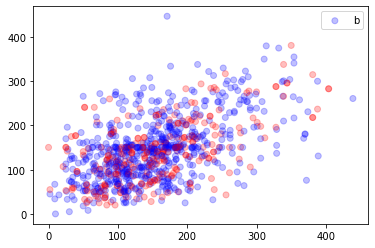

In [32]:
# visualization to play with
plt.scatter(data=matched_data1, x="V00PASE", y="V05PASE", c="TKR", cmap="bwr", alpha = 0.25)
plt.legend("best")
plt.show()

#len(df_visit00[df_visit00["P02KRSCV"]=='1: Right knee'])


# Get data from subject id

In [6]:
a=np.loadtxt("SUBJECTS_09-03.txt",dtype='str')

In [7]:
len(a)-896

225

In [5]:
import numpy as np